In [ ]:
# Library
from skimage import feature
from imutils import paths
import numpy as np
import cv2 as cv
import os 
import pandas as pd
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Function

Metode Preprocessing

In [ ]:
def preprocess(image, image_size=128):
		image = cv.cvtColor(image, cv.COLOR_BGR2GRAY) # Ubah mehjadi grayscale
		image = cv.resize(image, (image_size, image_size)) # Resize gambar menjadi suatu ukuran (default = 128)

		image = cv.threshold(image, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1] # Melakukan thresholding dan mengambil hasil gambar thresholding

		return image

Histogram of Oriented Gradients (HOG)

In [ ]:
def quantify_image_hog(image):
  features = feature.hog(image, orientations=9, pixels_per_cell=(10, 10), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")

  return features

Local Binary Patterns (LBP)

In [ ]:
def quantify_image_lbp(image):
  features = feature.local_binary_pattern(image, 24, 8, method="uniform")

  (hist, _) = np.histogram(features.flatten(), bins=np.arange(0, 27), range=(0, 26))

  hist = hist.astype("float")
  hist /= (hist.sum() + 1e-7)

  return hist

 Split Dataset

In [ ]:
def load_split(path, image_size=128, extraction_method='hog'):
  image_paths = list(paths.list_images(path))
  data = []
  labels = []

  for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]

    image = cv.imread(image_path)
    image = preprocess(image, image_size=image_size)

    if extraction_method == 'hog':
      features = quantify_image_hog(image)
    elif extraction_method == 'lbp':
      features = quantify_image_lbp(image)

    data.append(features)
    labels.append(label)

  return (np.array(data), np.array(labels))

Load Dataset

In [ ]:
dataset_dir = '/content/drive/My Drive/Datasets/parkinsons/wave'

trainingPath = os.path.join(dataset_dir, "training")
testingPath = os.path.join(dataset_dir, "testing")

Algoritma Classification

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

Linear SVC

In [ ]:
from sklearn.svm import LinearSVC

def classifier_linearsvc(feature_train, feature_test, label_train, label_test):
  ls = LinearSVC(random_state=10)
  ls.fit(feature_train, label_train)
  pred = ls.predict(feature_test)

  print("Linear SVC Classifier")
  print(classification_report(label_test, pred))
  
  print('Accuracy of LinearSVC Classifier on test set: {:.2f}'.format(ls.score(feature_test, label_test)))
  print("F1", f1_score(label_test, pred, average="macro"))
  print("Precision", precision_score(label_test, pred, average="macro"))
  print("Recall", recall_score(label_test, pred, average="macro"))

  return

Logistic Regression



In [ ]:
from sklearn.linear_model import LogisticRegression

def classifier_logreg(feature_train, feature_test, label_train, label_test):
  logreg = LogisticRegression()
  logreg.fit(feature_train, label_train)
  pred = logreg.predict(feature_test)

  print("Logistic Regression Classifier")
  print(classification_report(label_test, pred))

  print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(logreg.score(feature_test, label_test)))
  print("F1", f1_score(label_test, pred, average="macro"))
  print("Precision", precision_score(label_test, pred, average="macro"))
  print("Recall", recall_score(label_test, pred, average="macro"))

  return

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def classifier_randomforest(feature_train, feature_test, label_train, label_test, n_estimator):
  model = RandomForestClassifier(n_estimators=n_estimator, random_state=10)
  model.fit(feature_train, label_train)
  predictions = model.predict(feature_test)

  print("Random Forest Classifier n_estimators:", n_estimator)
  print(classification_report(label_test, predictions))
  print(pd.crosstab(label_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True))

  print('Accuracy of Random Forest on test set: {:.2f}'.format(model.score(feature_test, label_test)))
  print("F1", f1_score(label_test, predictions, average="macro")) 
  print("Precision", precision_score(label_test, predictions, average="macro"))
  print("Recall", recall_score(label_test, predictions, average="macro"))

  return

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def classifier_knn(feature_train, feature_test, label_train, label_test, n_neighbor):
 
  knn = KNeighborsClassifier(n_neighbors=n_neighbor, weights='uniform', algorithm='ball_tree', leaf_size=30)
  knn.fit(feature_train, label_train)
  predictions = knn.predict(feature_test)

  print("KNneighbors Classifier n_neighbors:", n_neighbor)
  print(classification_report(label_test, predictions))

  print('Accuracy of KNN on test set: {:.2f}'.format(knn.score(feature_test, label_test)))
  print("F1", f1_score(label_test, predictions, average="macro")) 
  print("Precision", precision_score(label_test, predictions, average="macro"))
  print("Recall", recall_score(label_test, predictions, average="macro"))

  return

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def classifier_dtree(feature_train, feature_test, label_train, label_test):
 
  dtree = DecisionTreeClassifier(max_depth=5, random_state=10)
  dtree.fit(feature_train, label_train)
  predictions = dtree.predict(feature_test)

  print("Decision Tree Classifier")
  print(classification_report(label_test, predictions))

  print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(dtree.score(feature_test, label_test)))
  print("F1", f1_score(label_test, predictions, average="macro")) 
  print("Precision", precision_score(label_test, predictions, average="macro"))
  print("Recall", recall_score(label_test, predictions, average="macro"))

  return

Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

def classifier_mlp(feature_train, feature_test, label_train, label_test):
 
  mlp = MLPClassifier(solver='lbfgs',alpha=0.001,learning_rate='constant', random_state=10, max_iter=2500)
  mlp.fit(feature_train, label_train)
  predictions = mlp.predict(feature_test)

  print("Neural Network MLP Classifier")
  print(classification_report(label_test, predictions))

  print('Accuracy of Neural Network MLP Classifier on test set: {:.2f}'.format(mlp.score(feature_test, label_test)))
  print("F1", f1_score(label_test, predictions, average="macro")) 
  print("Precision", precision_score(label_test, predictions, average="macro"))
  print("Recall", recall_score(label_test, predictions, average="macro"))

  return

# No. 1


## Feature extractor HOG dengan image size 128

In [ ]:
resize_image_size = 128
extraction_method = 'hog'

In [ ]:
# Split Dataset

(feature_train, label_train) = load_split(trainingPath, image_size=resize_image_size, extraction_method=extraction_method)
(feature_test, label_test) = load_split(testingPath, image_size=resize_image_size, extraction_method=extraction_method)

print("Data loaded!")

# Encode label (0 = healthy, 1 = parkinsons)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label_train = le.fit_transform(label_train)
label_test = le.transform(label_test)

Data loaded!


In [ ]:
classifier_linearsvc(feature_train, feature_test, label_train, label_test)

Linear SVC Classifier
              precision    recall  f1-score   support

           0       0.71      0.67      0.69        15
           1       0.69      0.73      0.71        15

    accuracy                           0.70        30
   macro avg       0.70      0.70      0.70        30
weighted avg       0.70      0.70      0.70        30

Accuracy of LinearSVC Classifier on test set: 0.70
F1 0.6996662958843158
Precision 0.7008928571428572
Recall 0.7


In [ ]:
classifier_logreg(feature_train, feature_test, label_train, label_test)

Logistic Regression Classifier
              precision    recall  f1-score   support

           0       0.62      0.67      0.65        15
           1       0.64      0.60      0.62        15

    accuracy                           0.63        30
   macro avg       0.63      0.63      0.63        30
weighted avg       0.63      0.63      0.63        30

Accuracy of Logistic Regression Classifier on test set: 0.63
F1 0.6329254727474972
Precision 0.6339285714285714
Recall 0.6333333333333333


In [ ]:
classifier_randomforest(feature_train, feature_test, label_train, label_test, 300)

Random Forest Classifier n_estimators: 300
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.79      0.73      0.76        15

    accuracy                           0.77        30
   macro avg       0.77      0.77      0.77        30
weighted avg       0.77      0.77      0.77        30

Predicted   0   1  All
True                  
0          12   3   15
1           4  11   15
All        16  14   30
Accuracy of Random Forest on test set: 0.77
F1 0.7664071190211346
Precision 0.7678571428571428
Recall 0.7666666666666666


In [ ]:
classifier_knn(feature_train, feature_test, label_train, label_test, 11)

KNneighbors Classifier n_neighbors: 11
              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.76      0.87      0.81        15

    accuracy                           0.80        30
   macro avg       0.81      0.80      0.80        30
weighted avg       0.81      0.80      0.80        30

Accuracy of KNN on test set: 0.80
F1 0.7991071428571428
Precision 0.8054298642533937
Recall 0.8


In [ ]:
classifier_dtree(feature_train, feature_test, label_train, label_test)

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.56      0.67      0.61        15
           1       0.58      0.47      0.52        15

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.56        30
weighted avg       0.57      0.57      0.56        30

Accuracy of Decision Tree Classifier on test set: 0.57
F1 0.5622895622895623
Precision 0.5694444444444444
Recall 0.5666666666666667


In [ ]:
classifier_mlp(feature_train, feature_test, label_train, label_test)

Neural Network MLP Classifier
              precision    recall  f1-score   support

           0       0.56      0.60      0.58        15
           1       0.57      0.53      0.55        15

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.57        30
weighted avg       0.57      0.57      0.57        30

Accuracy of Neural Network MLP Classifier on test set: 0.57
F1 0.5661846496106784
Precision 0.5669642857142857
Recall 0.5666666666666667


## Feature extractor HOG dengan image size 300

In [ ]:
resize_image_size = 300
extraction_method = 'hog'

In [ ]:
# Split Dataset

(feature_train, label_train) = load_split(trainingPath, image_size=resize_image_size, extraction_method=extraction_method)
(feature_test, label_test) = load_split(testingPath, image_size=resize_image_size, extraction_method=extraction_method)

print("Data loaded!")

# Encode label (0 = healthy, 1 = parkinsons)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label_train = le.fit_transform(label_train)
label_test = le.transform(label_test)

Data loaded!


In [ ]:
classifier_linearsvc(feature_train, feature_test, label_train, label_test)

Linear SVC Classifier
              precision    recall  f1-score   support

           0       0.63      0.80      0.71        15
           1       0.73      0.53      0.62        15

    accuracy                           0.67        30
   macro avg       0.68      0.67      0.66        30
weighted avg       0.68      0.67      0.66        30

Accuracy of LinearSVC Classifier on test set: 0.67
F1 0.6606334841628959
Precision 0.6794258373205742
Recall 0.6666666666666667


In [ ]:
classifier_logreg(feature_train, feature_test, label_train, label_test)

Logistic Regression Classifier
              precision    recall  f1-score   support

           0       0.63      0.80      0.71        15
           1       0.73      0.53      0.62        15

    accuracy                           0.67        30
   macro avg       0.68      0.67      0.66        30
weighted avg       0.68      0.67      0.66        30

Accuracy of Logistic Regression Classifier on test set: 0.67
F1 0.6606334841628959
Precision 0.6794258373205742
Recall 0.6666666666666667


In [ ]:
classifier_randomforest(feature_train, feature_test, label_train, label_test, 300)

Random Forest Classifier n_estimators: 300
              precision    recall  f1-score   support

           0       0.63      0.80      0.71        15
           1       0.73      0.53      0.62        15

    accuracy                           0.67        30
   macro avg       0.68      0.67      0.66        30
weighted avg       0.68      0.67      0.66        30

Predicted   0   1  All
True                  
0          12   3   15
1           7   8   15
All        19  11   30
Accuracy of Random Forest on test set: 0.67
F1 0.6606334841628959
Precision 0.6794258373205742
Recall 0.6666666666666667


In [ ]:
classifier_knn(feature_train, feature_test, label_train, label_test, 11)

KNneighbors Classifier n_neighbors: 11
              precision    recall  f1-score   support

           0       0.48      0.87      0.62        15
           1       0.33      0.07      0.11        15

    accuracy                           0.47        30
   macro avg       0.41      0.47      0.37        30
weighted avg       0.41      0.47      0.37        30

Accuracy of KNN on test set: 0.47
F1 0.3650793650793651
Precision 0.4074074074074074
Recall 0.4666666666666667


In [ ]:
classifier_dtree(feature_train, feature_test, label_train, label_test)

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.56      0.67      0.61        15
           1       0.58      0.47      0.52        15

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.56        30
weighted avg       0.57      0.57      0.56        30

Accuracy of Decision Tree Classifier on test set: 0.57
F1 0.5622895622895623
Precision 0.5694444444444444
Recall 0.5666666666666667


In [ ]:
classifier_mlp(feature_train, feature_test, label_train, label_test)

Neural Network MLP Classifier
              precision    recall  f1-score   support

           0       0.59      0.67      0.62        15
           1       0.62      0.53      0.57        15

    accuracy                           0.60        30
   macro avg       0.60      0.60      0.60        30
weighted avg       0.60      0.60      0.60        30

Accuracy of Neural Network MLP Classifier on test set: 0.60
F1 0.5982142857142858
Precision 0.6018099547511313
Recall 0.6


## Feature extractor LBP dengan image size 128

In [ ]:
resize_image_size = 128
extraction_method = 'lbp'

In [ ]:
# Split Dataset

(feature_train, label_train) = load_split(trainingPath, image_size=resize_image_size, extraction_method=extraction_method)
(feature_test, label_test) = load_split(testingPath, image_size=resize_image_size, extraction_method=extraction_method)

print("Data loaded!")

# Encode label (0 = healthy, 1 = parkinsons)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label_train = le.fit_transform(label_train)
label_test = le.transform(label_test)

Data loaded!


In [ ]:
classifier_linearsvc(feature_train, feature_test, label_train, label_test)

Linear SVC Classifier
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        15
           1       0.00      0.00      0.00        15

    accuracy                           0.50        30
   macro avg       0.25      0.50      0.33        30
weighted avg       0.25      0.50      0.33        30

Accuracy of LinearSVC Classifier on test set: 0.50
F1 0.3333333333333333
Precision 0.25
Recall 0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
classifier_logreg(feature_train, feature_test, label_train, label_test)

Logistic Regression Classifier
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        15
           1       0.00      0.00      0.00        15

    accuracy                           0.50        30
   macro avg       0.25      0.50      0.33        30
weighted avg       0.25      0.50      0.33        30

Accuracy of Logistic Regression Classifier on test set: 0.50
F1 0.3333333333333333
Precision 0.25
Recall 0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
classifier_randomforest(feature_train, feature_test, label_train, label_test, 300)

Random Forest Classifier n_estimators: 300
              precision    recall  f1-score   support

           0       0.48      0.73      0.58        15
           1       0.43      0.20      0.27        15

    accuracy                           0.47        30
   macro avg       0.45      0.47      0.43        30
weighted avg       0.45      0.47      0.43        30

Predicted   0  1  All
True                 
0          11  4   15
1          12  3   15
All        23  7   30
Accuracy of Random Forest on test set: 0.47
F1 0.4258373205741627
Precision 0.45341614906832295
Recall 0.4666666666666667


In [ ]:
classifier_knn(feature_train, feature_test, label_train, label_test, 11)

KNneighbors Classifier n_neighbors: 11
              precision    recall  f1-score   support

           0       0.50      0.67      0.57        15
           1       0.50      0.33      0.40        15

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.50      0.50      0.49        30

Accuracy of KNN on test set: 0.50
F1 0.48571428571428577
Precision 0.5
Recall 0.5


In [ ]:
classifier_dtree(feature_train, feature_test, label_train, label_test)

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.47      0.53      0.50        15
           1       0.46      0.40      0.43        15

    accuracy                           0.47        30
   macro avg       0.47      0.47      0.46        30
weighted avg       0.47      0.47      0.46        30

Accuracy of Decision Tree Classifier on test set: 0.47
F1 0.4642857142857143
Precision 0.4660633484162896
Recall 0.4666666666666667


In [ ]:
classifier_mlp(feature_train, feature_test, label_train, label_test)

Neural Network MLP Classifier
              precision    recall  f1-score   support

           0       0.57      0.80      0.67        15
           1       0.67      0.40      0.50        15

    accuracy                           0.60        30
   macro avg       0.62      0.60      0.58        30
weighted avg       0.62      0.60      0.58        30

Accuracy of Neural Network MLP Classifier on test set: 0.60
F1 0.5833333333333333
Precision 0.6190476190476191
Recall 0.6000000000000001


## Feature extractor LBP dengan image size 300

In [ ]:
resize_image_size = 300
extraction_method = 'lbp'

In [ ]:
# Split Dataset

(feature_train, label_train) = load_split(trainingPath, image_size=resize_image_size, extraction_method=extraction_method)
(feature_test, label_test) = load_split(testingPath, image_size=resize_image_size, extraction_method=extraction_method)

print("Data loaded!")

# Encode label (0 = healthy, 1 = parkinsons)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label_train = le.fit_transform(label_train)
label_test = le.transform(label_test)

Data loaded!


In [ ]:
classifier_linearsvc(feature_train, feature_test, label_train, label_test)

Linear SVC Classifier
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        15
           1       0.00      0.00      0.00        15

    accuracy                           0.50        30
   macro avg       0.25      0.50      0.33        30
weighted avg       0.25      0.50      0.33        30

Accuracy of LinearSVC Classifier on test set: 0.50
F1 0.3333333333333333
Precision 0.25
Recall 0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
classifier_logreg(feature_train, feature_test, label_train, label_test)

Logistic Regression Classifier
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        15
           1       0.00      0.00      0.00        15

    accuracy                           0.50        30
   macro avg       0.25      0.50      0.33        30
weighted avg       0.25      0.50      0.33        30

Accuracy of Logistic Regression Classifier on test set: 0.50
F1 0.3333333333333333
Precision 0.25
Recall 0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
classifier_randomforest(feature_train, feature_test, label_train, label_test, 300)

Random Forest Classifier n_estimators: 300
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        15
           1       0.67      0.67      0.67        15

    accuracy                           0.67        30
   macro avg       0.67      0.67      0.67        30
weighted avg       0.67      0.67      0.67        30

Predicted   0   1  All
True                  
0          10   5   15
1           5  10   15
All        15  15   30
Accuracy of Random Forest on test set: 0.67
F1 0.6666666666666666
Precision 0.6666666666666666
Recall 0.6666666666666666


In [ ]:
classifier_knn(feature_train, feature_test, label_train, label_test, 11)

KNneighbors Classifier n_neighbors: 11
              precision    recall  f1-score   support

           0       0.54      0.87      0.67        15
           1       0.67      0.27      0.38        15

    accuracy                           0.57        30
   macro avg       0.60      0.57      0.52        30
weighted avg       0.60      0.57      0.52        30

Accuracy of KNN on test set: 0.57
F1 0.5238095238095238
Precision 0.6041666666666666
Recall 0.5666666666666667


In [ ]:
classifier_dtree(feature_train, feature_test, label_train, label_test)

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.63      0.80      0.71        15
           1       0.73      0.53      0.62        15

    accuracy                           0.67        30
   macro avg       0.68      0.67      0.66        30
weighted avg       0.68      0.67      0.66        30

Accuracy of Decision Tree Classifier on test set: 0.67
F1 0.6606334841628959
Precision 0.6794258373205742
Recall 0.6666666666666667


In [ ]:
classifier_mlp(feature_train, feature_test, label_train, label_test)

Neural Network MLP Classifier
              precision    recall  f1-score   support

           0       0.61      0.93      0.74        15
           1       0.86      0.40      0.55        15

    accuracy                           0.67        30
   macro avg       0.73      0.67      0.64        30
weighted avg       0.73      0.67      0.64        30

Accuracy of Neural Network MLP Classifier on test set: 0.67
F1 0.6411483253588517
Precision 0.7329192546583851
Recall 0.6666666666666667


## Testing Paths

In [ ]:
testing_paths = list(paths.list_images(testingPath))
images = []
knn = KNeighborsClassifier(n_neighbors=11, weights='uniform', algorithm='ball_tree', leaf_size=30)
knn.fit(feature_train, label_train)

for testing_path in testing_paths[:25]:
	image = cv.imread(testing_path)
	output = image.copy()
	output = cv.resize(output, (128, 128))

	image = preprocess(image, image_size=resize_image_size)

	if extraction_method == 'hog':
		features = quantify_image_hog(image)
	elif extraction_method == 'lbp':
		features = quantify_image_lbp(image)
   
	preds = knn.predict([features])
	label = le.inverse_transform(preds)[0]

	color = (0, 255, 0) if label == "healthy" else (0, 0, 255)
	cv.putText(output, label, (3, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
	images.append(output)

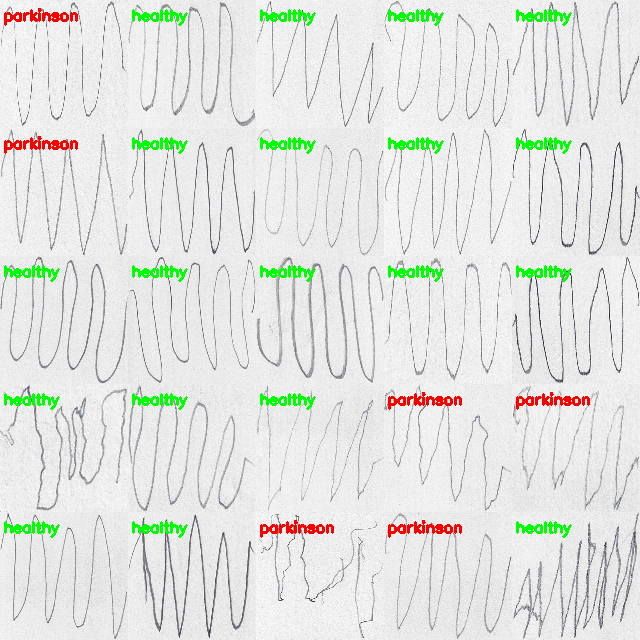

In [ ]:
from imutils import build_montages

montage = build_montages(images, (128,128), (5, 5))[0]

cv2_imshow(montage)

## Kesimpulan

Dari data di atas, ditemukan hasil terbaik untuk masing-masing algoritma pada HOG dan LBP :

HOG - image size 128, menggunakan KNN(k=11) memiliki akurasi 83% & f1 score 83%

HOG - image size 300, menggunakan LinearSVC memiliki akurasi 73% & f1 score 73%

LBP - image size 128, menggunakan Desicion Tree memiliki akurasi 63% & f1 score 63%

HOG - image size 128, menggunakan Neural Network memiliki akurasi 73% & f1 score 73%

Dengan metode ekstraksi dan image size yang berbeda-beda menghasilkan keakurasian yang berbeda pula, dapat disimpulkan bahwa hasil keakurasian tergantung dengan objek /teksture di dalam gambar yang akan di klasifikasikan

# No. 2

## Input Wave Healthy

In [ ]:
image = cv.imread('/content/drive/My Drive/Images/parkinson-wave-healthy.jpg')

image_orig = image.copy()

image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

image_thresh = cv.threshold(image_gray, 140, 255, cv.THRESH_BINARY)[1]

thresholding_result = cv.bitwise_not(image_thresh)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(9,9))
dilation = cv.dilate(thresholding_result,kernel,iterations = 2)

contours, hierarchy = cv.findContours(thresholding_result, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

data_area = []
for index, contour in enumerate(contours):
  x, y, w, h = cv.boundingRect(contour)
  area = cv.contourArea(contour)
  data_area.append([index, area, w, h])

df_area = pd.DataFrame(data_area)
df_area.columns = ['index', 'area', 'width', 'height']
df_sort = df_area.sort_values(by=['area'],ascending=False)
df_sort.head(20)

,index,area,width,height
7,7,17968.0,561,358
14,14,17612.5,521,380
9,9,14370.5,518,304
15,15,12846.0,439,272
8,8,12192.0,586,261
6,6,11317.0,490,238
13,13,11079.0,433,257
16,16,11006.5,413,221
17,17,10961.5,529,253
23,23,10741.5,464,242


In [ ]:
test = df_area['area']
array = []
directory_save = '/content/drive/My Drive/Datasets/parkinsons/wave/training/healthy'

for i, v in enumerate(test):
  if test[i] > 8000:
    array.append(i)

array.sort()
# print(array)
os.chdir(directory_save)

for i, v in enumerate(array):
  x, y, w, h = cv.boundingRect(contours[v])
  wave = image[y:y+h, x:x+w]
  image_resize = cv.resize(wave, (512, 256), interpolation =cv.INTER_AREA)
  cv.imwrite('wave{}.png'.format(i), image_resize)

print(os.listdir(directory_save))

['V02HO02.png', 'V02HO03.png', 'V03HO02.png', 'V03HO03.png', 'V08HO02.png', 'V08HO03.png', 'V09HO02.png', 'V09HO03.png', 'V05HO02.png', 'V05HO03.png', 'V12HO01.png', 'V12HO02.png', 'V12HO03.png', 'V11HO02.png', 'V11HO03.png', 'V10HO02.png', 'V10HO03.png', 'V07HO02.png', 'V07HO03.png', 'V06HO02.png', 'V06HO03.png', 'V01HO02.png', 'V01HO03.png', 'V04HO02.png', 'V04HO03.png', 'V55HO01.png', 'V55HO02.png', 'V55HO03.png', 'V55HO04.png', 'V55HO05.png', 'V55HO06.png', 'V55HO07.png', 'V55HO12.png', 'V55HO13.png', 'V55HO14.png', 'V55HO15.png', 'wave().png', 'wave0.png', 'wave1.png', 'wave2.png', 'wave3.png', 'wave4.png', 'wave5.png', 'wave6.png', 'wave7.png', 'wave8.png', 'wave9.png', 'wave10.png', 'wave11.png', 'wave12.png', 'wave13.png', 'wave14.png']


## Input Wave Parkinson

In [ ]:
image = cv.imread('/content/drive/My Drive/Images/parkinson-wave-sick.jpg')

image_orig = image.copy()

image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

image_thresh = cv.threshold(image_gray, 140, 255, cv.THRESH_BINARY)[1]

thresholding_result = cv.bitwise_not(image_thresh)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(9,9))
dilation = cv.dilate(thresholding_result,kernel,iterations = 2)

contours, hierarchy = cv.findContours(thresholding_result, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

data_area = []
for index, contour in enumerate(contours):
  x, y, w, h = cv.boundingRect(contour)
  area = cv.contourArea(contour)
  data_area.append([index, area, w, h])

df_area = pd.DataFrame(data_area)
df_area.columns = ['index', 'area', 'width', 'height']
df_sort = df_area.sort_values(by=['area'],ascending=False)
df_sort.head(20)

,index,area,width,height
108,108,17116.0,477,486
117,117,15977.5,590,355
116,116,13522.5,388,318
92,92,12730.0,561,594
120,120,12212.0,478,253
83,83,11675.5,429,342
115,115,11345.0,423,312
106,106,10272.5,445,359
93,93,9849.0,482,478
107,107,9767.0,347,278


In [ ]:
test = df_area['area']
array = []
directory_save = '/content/drive/My Drive/Datasets/parkinsons/wave/training/healthy'

for i, v in enumerate(test):
  if test[i] > 3800:
    array.append(i)

array.sort()
# print(array)
os.chdir(directory_save)

for i, v in enumerate(array):
  x, y, w, h = cv.boundingRect(contours[v])
  wave = image[y:y+h, x:x+w]
  image_resize = cv.resize(wave, (512, 256), interpolation =cv.INTER_AREA)
  cv.imwrite('wave{}.png'.format(i), image_resize)

print(os.listdir(directory_save))

['V02HO02.png', 'V02HO03.png', 'V03HO02.png', 'V03HO03.png', 'V08HO02.png', 'V08HO03.png', 'V09HO02.png', 'V09HO03.png', 'V05HO02.png', 'V05HO03.png', 'V12HO01.png', 'V12HO02.png', 'V12HO03.png', 'V11HO02.png', 'V11HO03.png', 'V10HO02.png', 'V10HO03.png', 'V07HO02.png', 'V07HO03.png', 'V06HO02.png', 'V06HO03.png', 'V01HO02.png', 'V01HO03.png', 'V04HO02.png', 'V04HO03.png', 'V55HO01.png', 'V55HO02.png', 'V55HO03.png', 'V55HO04.png', 'V55HO05.png', 'V55HO06.png', 'V55HO07.png', 'V55HO12.png', 'V55HO13.png', 'V55HO14.png', 'V55HO15.png', 'wave().png', 'wave0.png', 'wave1.png', 'wave2.png', 'wave3.png', 'wave4.png', 'wave5.png', 'wave6.png', 'wave7.png', 'wave8.png', 'wave9.png', 'wave10.png', 'wave11.png', 'wave12.png', 'wave13.png', 'wave14.png']


## Feature extractor HOG dengan image size 128

In [ ]:
dataset_dir = '/content/drive/My Drive/Datasets/parkinsons/wave'

trainingPath = os.path.join(dataset_dir, "training")
testingPath = os.path.join(dataset_dir, "testing")

In [ ]:
resize_image_size = 128
extraction_method = 'hog'

In [ ]:
# Split Dataset

(feature_train, label_train) = load_split(trainingPath, image_size=resize_image_size, extraction_method=extraction_method)
(feature_test, label_test) = load_split(testingPath, image_size=resize_image_size, extraction_method=extraction_method)

print("Data loaded!")

# Encode label (0 = healthy, 1 = parkinsons)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label_train = le.fit_transform(label_train)
label_test = le.transform(label_test)

Data loaded!


In [ ]:
classifier_linearsvc(feature_train, feature_test, label_train, label_test)

Linear SVC Classifier
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.73      0.73      0.73        15

    accuracy                           0.73        30
   macro avg       0.73      0.73      0.73        30
weighted avg       0.73      0.73      0.73        30

Accuracy of LinearSVC Classifier on test set: 0.73
F1 0.7333333333333333
Precision 0.7333333333333333
Recall 0.7333333333333333


In [ ]:
classifier_logreg(feature_train, feature_test, label_train, label_test)

Logistic Regression Classifier
              precision    recall  f1-score   support

           0       0.62      0.67      0.65        15
           1       0.64      0.60      0.62        15

    accuracy                           0.63        30
   macro avg       0.63      0.63      0.63        30
weighted avg       0.63      0.63      0.63        30

Accuracy of Logistic Regression Classifier on test set: 0.63
F1 0.6329254727474972
Precision 0.6339285714285714
Recall 0.6333333333333333


In [ ]:
classifier_knn(feature_train, feature_test, label_train, label_test, 11)

KNneighbors Classifier n_neighbors: 11
              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.76      0.87      0.81        15

    accuracy                           0.80        30
   macro avg       0.81      0.80      0.80        30
weighted avg       0.81      0.80      0.80        30

Accuracy of KNN on test set: 0.80
F1 0.7991071428571428
Precision 0.8054298642533937
Recall 0.8


In [ ]:
classifier_randomforest(feature_train, feature_test, label_train, label_test, 300)

Random Forest Classifier n_estimators: 300
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.79      0.73      0.76        15

    accuracy                           0.77        30
   macro avg       0.77      0.77      0.77        30
weighted avg       0.77      0.77      0.77        30

Predicted   0   1  All
True                  
0          12   3   15
1           4  11   15
All        16  14   30
Accuracy of Random Forest on test set: 0.77
F1 0.7664071190211346
Precision 0.7678571428571428
Recall 0.7666666666666666


In [ ]:
classifier_dtree(feature_train, feature_test, label_train, label_test)

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.60      0.60      0.60        15
           1       0.60      0.60      0.60        15

    accuracy                           0.60        30
   macro avg       0.60      0.60      0.60        30
weighted avg       0.60      0.60      0.60        30

Accuracy of Decision Tree Classifier on test set: 0.60
F1 0.6
Precision 0.6
Recall 0.6


In [ ]:
classifier_mlp(feature_train, feature_test, label_train, label_test)

Neural Network MLP Classifier
              precision    recall  f1-score   support

           0       0.57      0.53      0.55        15
           1       0.56      0.60      0.58        15

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.57        30
weighted avg       0.57      0.57      0.57        30

Accuracy of Neural Network MLP Classifier on test set: 0.57
F1 0.5661846496106784
Precision 0.5669642857142857
Recall 0.5666666666666667


In [ ]:
testing_paths = list(paths.list_images(testingPath))
images = []
# model = KNeighborsClassifier(n_neighbors=11, weights='uniform', algorithm='ball_tree', leaf_size=30)
# model.fit(feature_train, label_train)

model = RandomForestClassifier(n_estimators=300, random_state=10)
model.fit(feature_train, label_train)

for testing_path in testing_paths[:25]:
	image = cv.imread(testing_path)
	output = image.copy()
	output = cv.resize(output, (128, 128))

	image = preprocess(image, image_size=resize_image_size)

	if extraction_method == 'hog':
		features = quantify_image_hog(image)
	elif extraction_method == 'lbp':
		features = quantify_image_lbp(image)
   
	preds = model.predict([features])
	label = le.inverse_transform(preds)[0]

	color = (0, 255, 0) if label == "healthy" else (0, 0, 255)
	cv.putText(output, label, (3, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
	images.append(output)

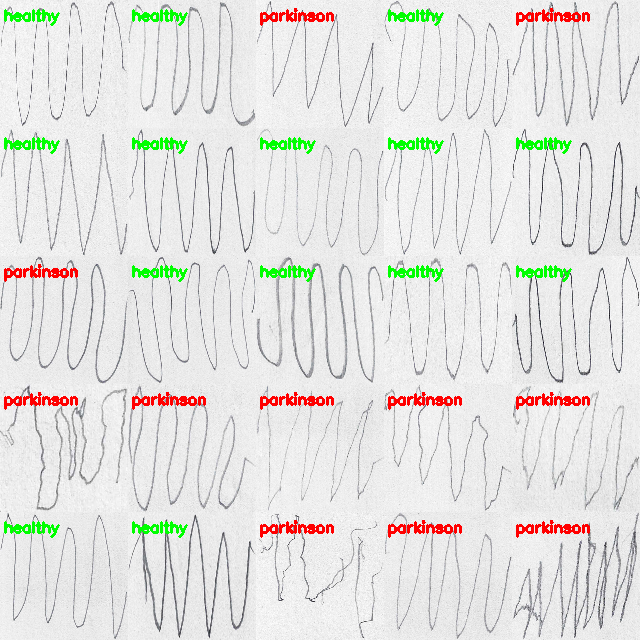

In [ ]:
from imutils import build_montages

montage = build_montages(images, (128,128), (5, 5))[0]

cv2_imshow(montage)

## Kesimpulan

Pada percobaan feature extractor HOG dengan image size 128, terjadi beberapa perubahan hasil akurasi. Diantaranya :

Akurasi LinearSVC menjadi 0.73, sebelumnya 0.70

Akurasi Random Forest menjadi 0.80, sebelumnya 0.77

Akurasi Decision Tree menjadi 0.57, sebelumnya 0.60

Dapat diambil kesimpulan, bahwa penambahan data training berpengaruh pada tingkat hasil akurasi yang didapatkan. Tergantung pula pada data yang ditambahkan seperti apa, apakah data tersebut baik, dimana gambar dapat dibedakan background dan modelnya, apakah intensitas warnanya cukup jelas serta apakah gambar memiliki noise atau tidak.